## Прогнозирование временных рядов

### Practice Quiz: Автокорреляция и стационарность

#### 3
В приложенном файле — данные по ежемесячному уровню производства молока в фунтах на одну корову:

Загрузите ряд, например, так:

`milk = pd.read_csv('monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)`

и постройте его график. Какой из приведённых ниже графиков у вас получился?

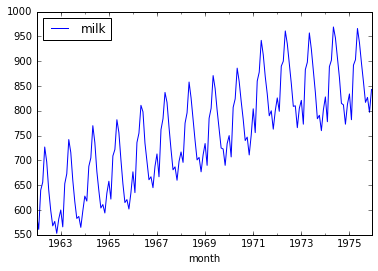

In [2]:
import pandas as pd
%matplotlib inline 

milk = pd.read_csv('monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)
milk.plot()

#### 4.

Примените к ряду из предыдущего вопроса критерий Дики-Фуллера. Это делается так:

`import statsmodels.api as sm
sm.tsa.stattools.adfuller(ряд)`

Чему равен полученный достигаемый уровень значимости? Округлите до двух знаков после десятичной точки.

In [5]:
import statsmodels.api as sm

sm.tsa.stattools.adfuller(milk['milk'])

(-1.303811587422125,
 0.62742670860303362,
 13,
 154,
 {'1%': -3.4735425281962091,
  '10%': -2.5768780536346769,
  '5%': -2.880497674144038},
 1115.1730447395112)

#### 5.

Часто, когда вы имеете дело с величинами, представляющими собой сумму значений показателя за каждый день или за каждый рабочий день, имеет смысл перед началом прогнозирования поделить весь ряд на число дней в периоде. Например, если поделить ряд с объёмом производства молока на одну корову на число дней в месяце, полученная величина будет меняться более плавно, и для неё легче будет построить прогнозирующую модель.

Корректно определить число дней в месяце можно с помощью свойства days_in_month у индекса ряда или функции monthrange из пакета calendar. Используйте число дней в месяце для того, чтобы вычислить новый показатель — среднее дневное число полученного молока на одну корову. Постройте график этого ряда и убедитесь, что он стал более гладким.

В качестве ответа введите сумму значений полученного показателя за весь период; округлите до двух знаков после десятичной точки.

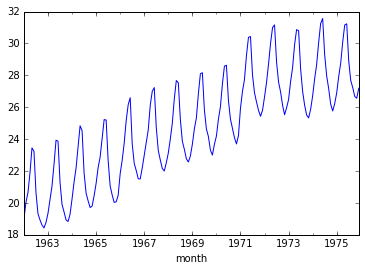

In [8]:
import calendar

days = [calendar.monthrange(i.year, i.month)[1] for i in milk.index]
milk['daily'] = milk['milk']/days
milk['daily'].plot()

In [10]:
sum(milk['daily'])

4166.3266618994639

### Quiz: Прогнозирование временных рядов

#### 6.

В приложенном файле — данные по ежемесячному уровню производства молока в фунтах на одну корову:

Загрузите ряд, создайте новый ряд значений среднего дневного уровня производства молока в фунтах на одну корову, поделив на число дней в месяце (вычисляется с помощью функции monthrange из пакета calendar). Постройте график полученного ряда; какой из приведённых ниже графиков у вас получился?

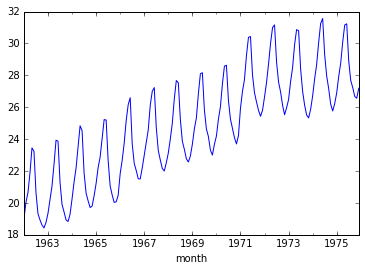

In [11]:
milk['daily'].plot()

#### 7.
Для ряда со средним дневным количеством молока на корову из предыдущего вопроса давайте с помощью критерий Дики-Фуллера подберём порядок дифференцирования, при котором ряд становится стационарным.

Дифференцирование можно делать так:

`milk.daily_diff1 = milk.daily - milk.daily.shift(1)`

Чтобы сделать сезонное дифференцирование, нужно изменить значение параметра у функции shift:

`milk.daily_diff12 = milk.daily - milk.daily.shift(12)`

При дифференцировании длина ряда сокращается, поэтому в части строк в новой колонке значения будут не определены (NaN). Подавая полученные столбцы на вход критерию Дики-Фуллера, отрезайте неопределённые значения, иначе вы получите неопределённый достигаемый уровень значимости.

Итак, какое дифференцирование делает ряд стационарным?

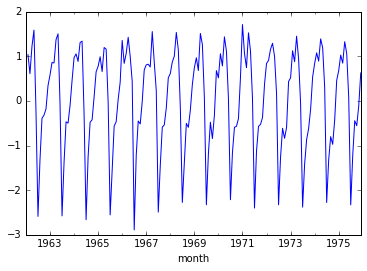

In [12]:
milk.daily_diff1 = milk.daily - milk.daily.shift(1)
milk.daily_diff1.plot()

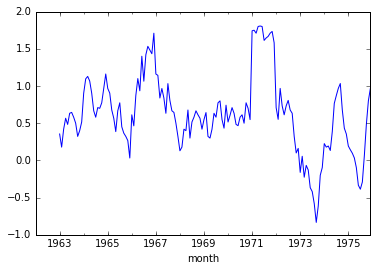

In [13]:
milk.daily_diff12 = milk.daily - milk.daily.shift(12)
milk.daily_diff12.plot()

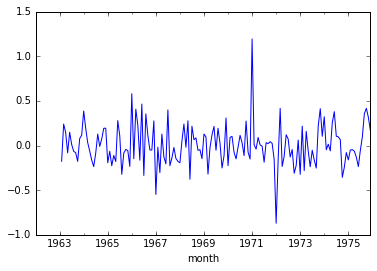

In [14]:
milk.daily_diff121 = milk.daily_diff12 - milk.daily_diff12.shift(1)
milk.daily_diff121.plot()

In [15]:
sm.tsa.stattools.adfuller(milk.daily_diff1.dropna())

(-2.7594694762288765,
 0.06430054654175224,
 11,
 155,
 {'1%': -3.4732590518613002,
  '10%': -2.5768120811654525,
  '5%': -2.8803740821053339},
 -1.1539973381055688)

In [16]:
sm.tsa.stattools.adfuller(milk.daily_diff12.dropna())

(-2.1594860932888071,
 0.221276726588304,
 12,
 143,
 {'1%': -3.4769274060112707,
  '10%': -2.5776654080884152,
  '5%': -2.8819726324025625},
 -25.225679141303317)

In [17]:
sm.tsa.stattools.adfuller(milk.daily_diff121.dropna())

(-5.4813263347969272,
 2.2808455518037347e-06,
 11,
 143,
 {'1%': -3.4769274060112707,
  '10%': -2.5776654080884152,
  '5%': -2.8819726324025625},
 -20.90513750989237)

#### 8.

Для стационарного ряда из предыдущего вопроса (продифференцированного столько раз, сколько вы посчитали нужным) постройте график автокорреляционной функции. Это можно cделать так:

`import statsmodels.api as sm
sm.graphics.tsa.plot_acf(ряд.values.squeeze(), lags=50)`

Исходя из этого графика, какое начальное приближение вы предложили бы для параметра $Q$ в модели SARIMA?

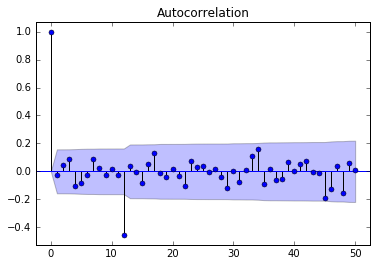

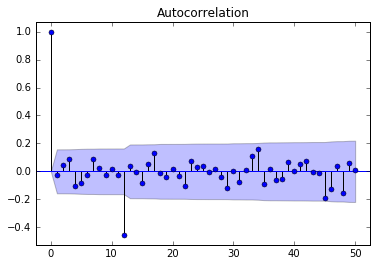

In [18]:
sm.graphics.tsa.plot_acf(milk.daily_diff121.dropna().values.squeeze(), lags=50)

#### 9.

Для того же ряда, что и в предыдущем вопросе, постройте график частичной автокорреляционной функции. Это можно сделать так:

`import statsmodels.api as sm
sm.graphics.tsa.plot_pacf(ряд.values.squeeze(), lags=50)`

Исходя из этого графика, какое начальное приближение вы предложили бы для параметра $p$ в модели SARIMA?

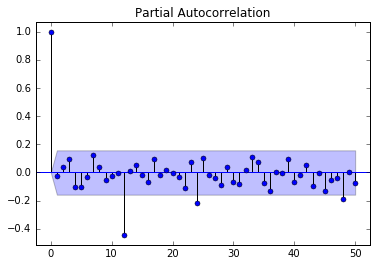

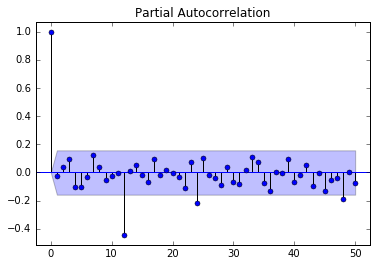

In [19]:
sm.graphics.tsa.plot_pacf(milk.daily_diff121.dropna().values.squeeze(), lags=50)